In [1]:
!pip install pandas
!pip install seaborn
import os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from PIL import Image
from scipy import stats
%matplotlib inline

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


# 0. Image Processing Function - images into RGB and metrics for analysis

In [2]:
def img_details(name):
    """Extract and process images from specified folder.
    
    Iterates through the directory and aggregates raw image data. Obtains image
    dimensions and separates and aggregates image data into Red, Green, and 
    Blue layers. Cleans and summarizes the aggregated image data by layer.
    Outputs a summary and a raw data dataframe.
    
    Args:
        name (str): The name of the folder containing images
    
    Returns:
        df (dataframe): Summary of image data (e.g., shape, average R)
        df_raw (dataframe): Aggregated raw image data 
    """
    directory = './dataset/' + name
    img_rgb_list = []
    
    # Loop through directory and aggregate image RGB values
    for (pth, dirs, files) in os.walk(directory):
        for fileName in files:
            img_abs_path = os.path.join(pth, fileName)
            img = Image.open(img_abs_path)
            img_rgb_list.append(np.array(img))
    
    # Obtain image dimensions and image data with this mapping R=0, G=1, B=2
    img_red, img_green, img_blue = [], [], []
    for i, img in enumerate(img_rgb_list):
        if len(img.shape) != 3:
            print(img.shape)
            print(files[i])
        elif img.shape[2] != 3:
            print(img.shape)
            print(files[i])
        else:
            img_red.extend(list(img[:, :, 0].flatten()))
            img_green.extend(list(img[:, :, 1].flatten()))
            img_blue.extend(list(img[:, :, 2].flatten()))
        if i > 20:
            break
            
    data_cleaned = [[
        name.replace('_', ' '), img.shape[0], img.shape[1], img.shape[2],
        img[:, :, 0].min(), img[:, :, 0].max(), img[:, :, 0].mean(),
        img[:, :, 1].min(), img[:, :, 1].max(), img[:, :, 1].mean(),
        img[:, :, 2].min(), img[:, :, 2].max(), img[:, :, 2].mean()
    ] for img in img_rgb_list]
    df = pd.DataFrame(data_cleaned,
                      columns=['class', 'height', 'width', 'layers',
                               'Rmin', 'Rmax', 'Ravg',
                               'Gmin', 'Gmax', 'Gavg',
                               'Bmin', 'Bmax', 'Bavg'])
    
    # Aggregate data into a single dataframe with labels
    df_raw_r = pd.DataFrame(img_red)
    df_raw_r['color'] = 'Red'
    df_raw_g = pd.DataFrame(img_green)
    df_raw_g['color'] = 'Green'
    df_raw_b = pd.DataFrame(img_blue)
    df_raw_b['color'] = 'Blue'
    df_raw = pd.concat([df_raw_r, df_raw_g, df_raw_b], axis=0)
    df_raw['class'] = name.replace('_', ' ')
    df_raw.columns = ['RGB_val', 'color', 'class']
    
    return df, df_raw

# 1. Data Import, Processing, and Aggregation

In [3]:
#Import & Process
df_dried_basil, df_dried_basil_raw = img_details('dried_basil')
df_dried_oregano, df_dried_oregano_raw = img_details('dried_oregano')
df_dried_thyme,df_dried_thyme_raw = img_details('dried_thyme')
df_dried_parsley, df_dried_parsley_raw = img_details('dried_parsley')
df_nonspice, df_nonspice_raw = img_details('non_spice')

In [4]:
df_combined = pd.concat([df_dried_basil, df_dried_oregano,
                         df_dried_thyme, df_dried_parsley,
                         df_nonspice], axis=0)

# 2. Data Exploration

## Graphs

In [5]:
# Create a copy of dataframe
df_combined2 = df_combined.copy()
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-notebook')

# Initial data summary <= Save this not here...
"""
-Total images is 802
-No missing values
-Rmin, Gmin, and Bmin have a minimum value of 0
-Rmax, Gmax, and Bmax have a maximum value of 255
-Ravg and Gavg means are close, while Bavg is lower
-Height and Width minimum are 52 and 70 respectively
-Height and Width minimum are 1536 and 2048 respectively
-Height and Width average are 408 and 501 respectively
-All have 3 layers (RGB)
"""

# All classes
df_combined2.describe()

# Just spice classes
df_spices = pd.concat([df_dried_basil, df_dried_oregano,
                       df_dried_thyme, df_dried_parsley], axis=0)
df_spices.describe()

height        width      layers        Rmin        Rmax  \
count   400.00000   400.000000  400.000000  400.000000  400.000000   
mean    427.03500   502.605000    3.005000    3.740000  254.567500   
std     347.25515   386.062683    0.070622    7.131588    4.194571   
min      52.00000    70.000000    3.000000    0.000000  190.000000   
25%     227.00000   261.000000    3.000000    0.000000  255.000000   
50%     320.00000   473.000000    3.000000    0.000000  255.000000   
75%     474.00000   551.250000    3.000000    5.000000  255.000000   
max    2976.00000  3968.000000    4.000000   45.000000  255.000000   

             Ravg        Gmin        Gmax        Gavg        Bmin        Bmax  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean   179.291687    1.842500  254.092500  173.754032    0.090000  252.522500   
std     38.145110    5.727539    6.027834   39.712286    0.913228    9.382942   
min     53.315964    0.000000  165.000000   53.243656    0.000000  166.000000   
25%    152.006299    0.000000  255.000000  145.837699    0.000000  255.000000   
50%    184.011340    0.000000  255.000000  177.954328    0.000000  255.000000   
75%    211.783217    0.000000  255.000000  206.894841    0.000000  255.000000   
max    247.749432   46.000000  255.000000  246.584790   15.000000  255.000000   

             Bavg  
count  400.000000  
mean   152.031118  
std     45.952688  
min     32.196531  
25%    120.375777  
50%    153.405163  
75%    190.432230  
max    244.139852

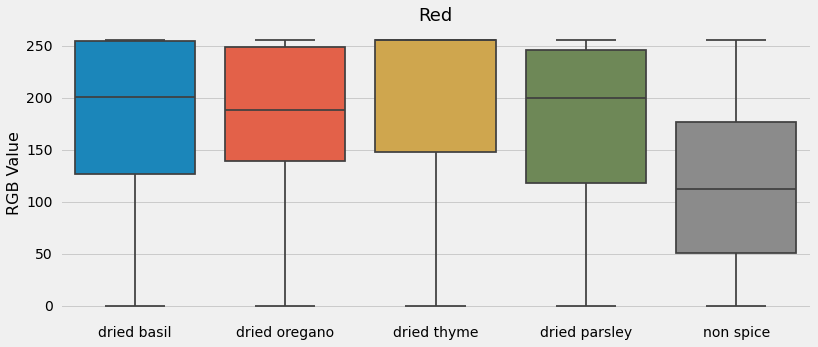

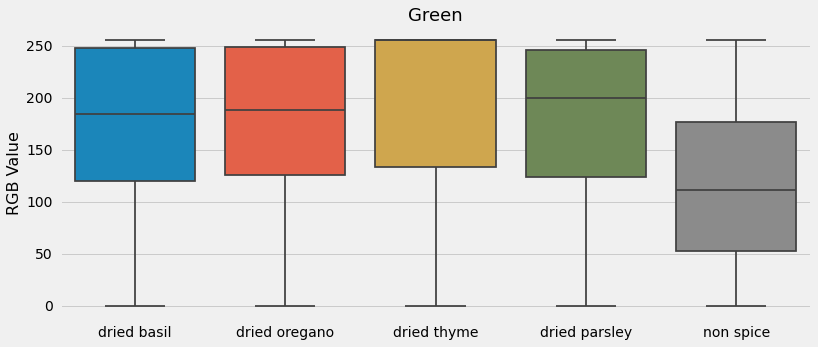

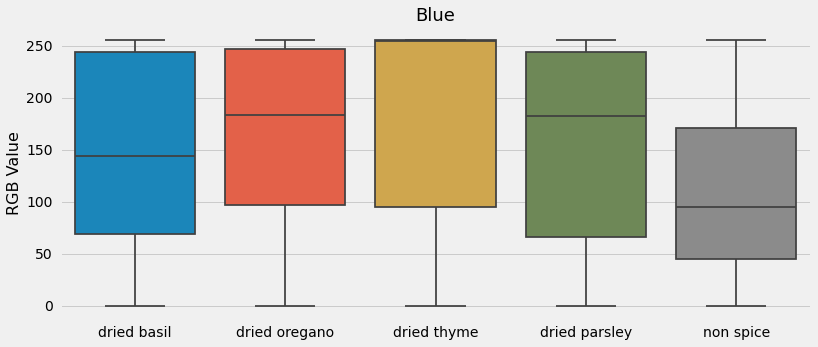

In [6]:
# Box plot for color by class (just the first 20 images of each class)
for color in ['Red', 'Green', 'Blue']:
    df_raw = pd.concat([
           df_dried_basil_raw[df_dried_basil_raw['color'] == color],
           df_dried_oregano_raw[df_dried_oregano_raw['color'] == color],
           df_dried_thyme_raw[df_dried_thyme_raw['color'] == color],
           df_dried_parsley_raw[df_dried_parsley_raw['color'] == color],
           df_nonspice_raw[df_nonspice_raw['color'] == color]], axis=0)
    plt.figure(figsize=(12,5))
    sns.boxplot(x="class", y="RGB_val", data=df_raw)
    plt.xlabel('')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel('RGB Value', fontsize=16)
    plt.title(color, fontsize=18)

non spice        470
dried oregano    100
dried basil      100
dried thyme      100
dried parsley    100
Name: class, dtype: int64


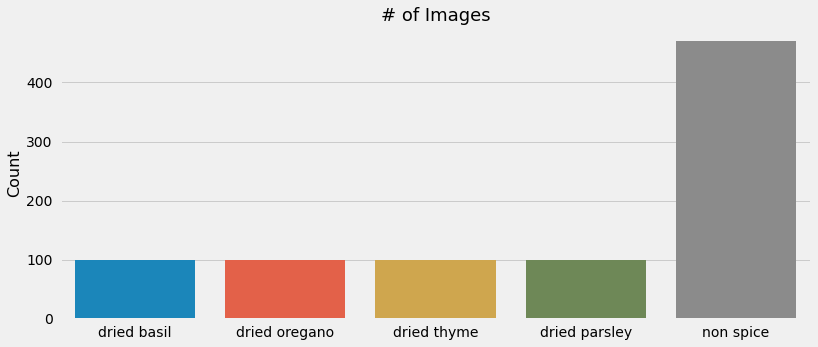

In [7]:
# Bar plot for images by Class
"""
-Order of largest to smallest number of images: oregano, thyme, parsley, basil
-Oregano: 88, Thyme: 83, Parsley: 81, Basil: 80, Random: 470
"""
fig, axes = plt.subplots(figsize=(12, 5))
sns.countplot(x="class", data=df_combined2)
axes.set_xlabel('', fontsize=16)
axes.set_ylabel('Count', fontsize=16)
axes.yaxis.set_tick_params(labelsize=14)
axes.xaxis.set_tick_params(labelsize=14)
axes.set_title('# of Images', fontsize=18)
print(df_combined['class'].value_counts())

Text(0, 0.5, 'Count')

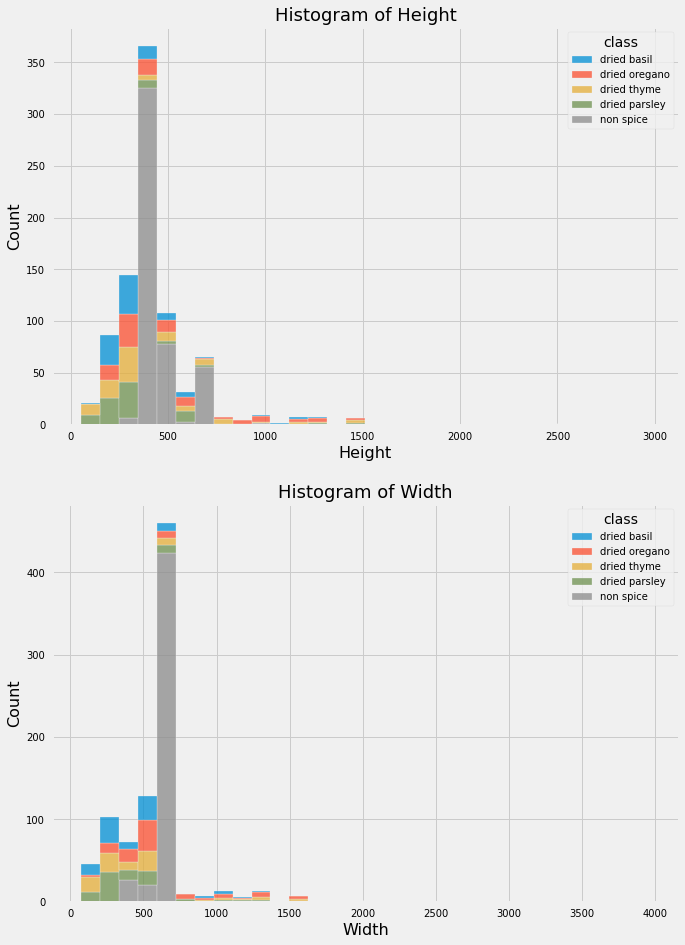

In [8]:
# Histogram for Height and Width
fig, axes = plt.subplots(2, 1, figsize=(10, 15))
sns.histplot(data=df_combined2, x='height', hue="class", 
             multiple="stack", ax=axes[0], bins=30)
sns.histplot(data=df_combined2, x='width', hue="class", 
             multiple="stack", ax=axes[1], bins=30)
axes[0].set_title('Histogram of Height', fontsize=18)
axes[1].set_title('Histogram of Width', fontsize=18)
axes[0].set_xlabel('Height', fontsize=16)
axes[0].set_ylabel('Count', fontsize=16)
axes[1].set_xlabel('Width', fontsize=16)
axes[1].set_ylabel('Count', fontsize=16)

In [9]:
df_combined2.loc[df_combined2['class'] != 'non_spice', 
                 ['height', 'width']].quantile(.10)

height    225.0
width     231.7
Name: 0.1, dtype: float64

In [10]:
# Setting input size for model
set_h_w = 200
print(stats.percentileofscore(
    df_combined2.loc[df_combined2['class'] != 'non_spice', ['height']], set_h_w))
print(stats.percentileofscore(
    df_combined2.loc[df_combined2['class'] != 'non_spice', ['width']], set_h_w))

6.896551724137931
5.287356321839081


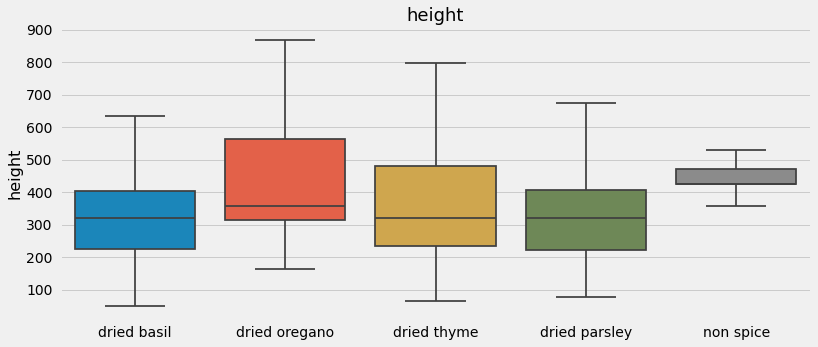

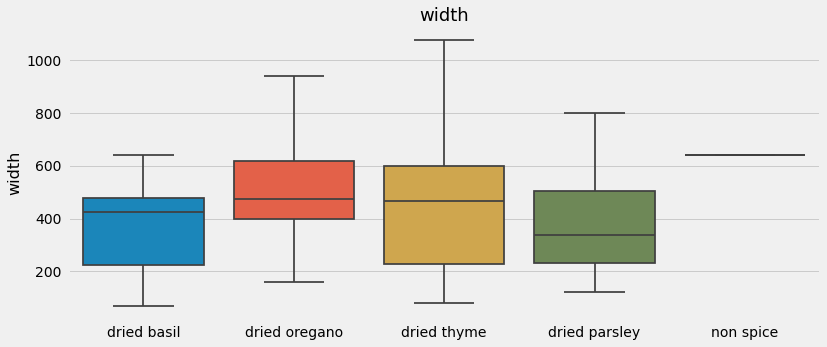

In [11]:
for y_val in ['height','width']:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x="class", y=y_val, data=df_combined2, showfliers = False)
    plt.xlabel('')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel(y_val, fontsize=16)
    plt.title(y_val, fontsize=18)
    plt.show()

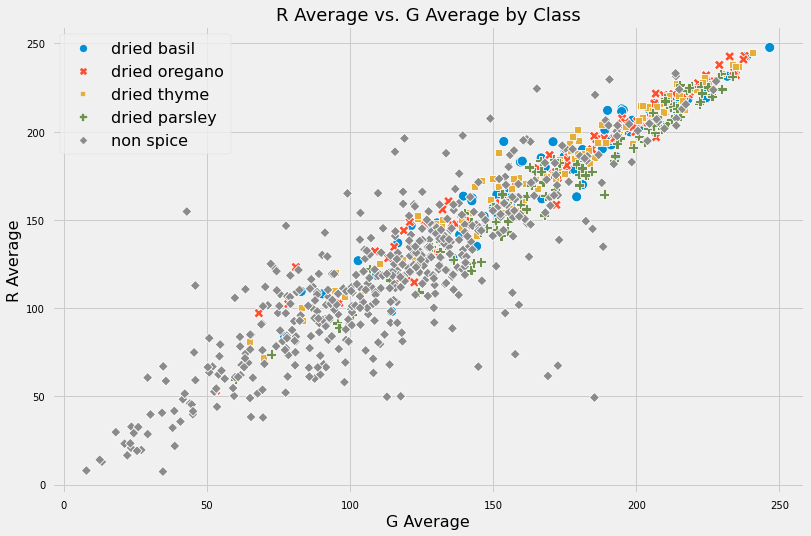

In [14]:
# Scatterplot for Gavg v. Ravg by Class
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.scatterplot(data=df_combined2, x='Gavg', y='Ravg', 
                       hue='class', style='class', s=100)
ax.set_xlabel('G Average', fontsize='16')
ax.set_ylabel('R Average', fontsize='16')
ax.set_title('R Average vs. G Average by Class', fontsize='18')
ax.legend(fontsize='16', loc='upper left')
plt.show()

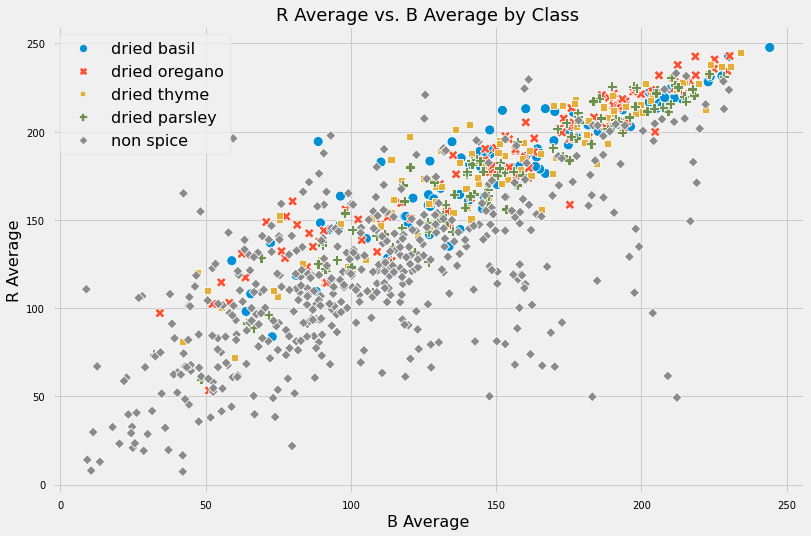

In [16]:
# Scatterplot for Bavg v. Ravg by Class
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.scatterplot(data=df_combined2, x='Bavg', y='Ravg', hue='class', 
                       style='class', s=100)
ax.set_xlabel('B Average', fontsize='16')
ax.set_ylabel('R Average', fontsize='16')
ax.set_title('R Average vs. B Average by Class', fontsize='18')
ax.legend(fontsize='16', loc='upper left')
plt.show()

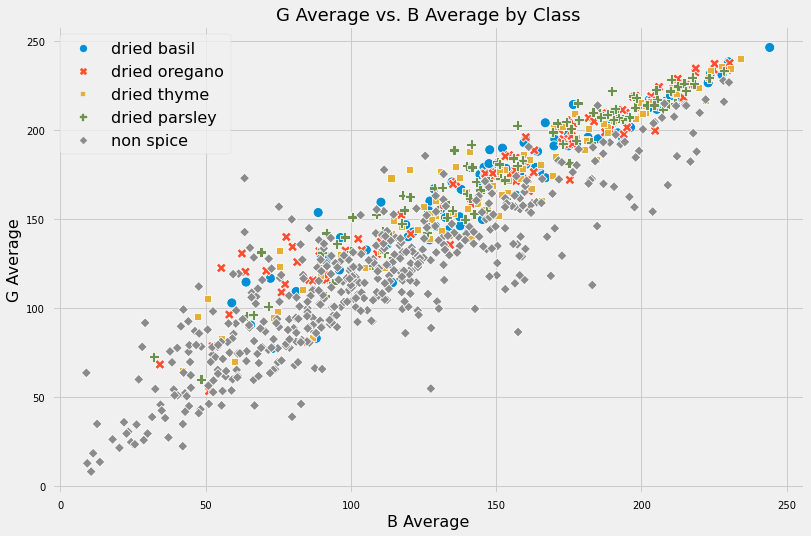

In [18]:
# Scatterplot for Gavg v. Bavg by Class
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.scatterplot(data=df_combined2, x='Bavg', y='Gavg', hue='class', 
                       style='class', s=100)
ax.set_xlabel('B Average', fontsize='16')
ax.set_ylabel('G Average', fontsize='16')
ax.set_title('G Average vs. B Average by Class', fontsize='18')
ax.legend(fontsize='16', loc='upper left')
plt.show()

## Image Manipulation

In [19]:
os.listdir('./dataset/dried_basil')[15]

'basil89.jpg'

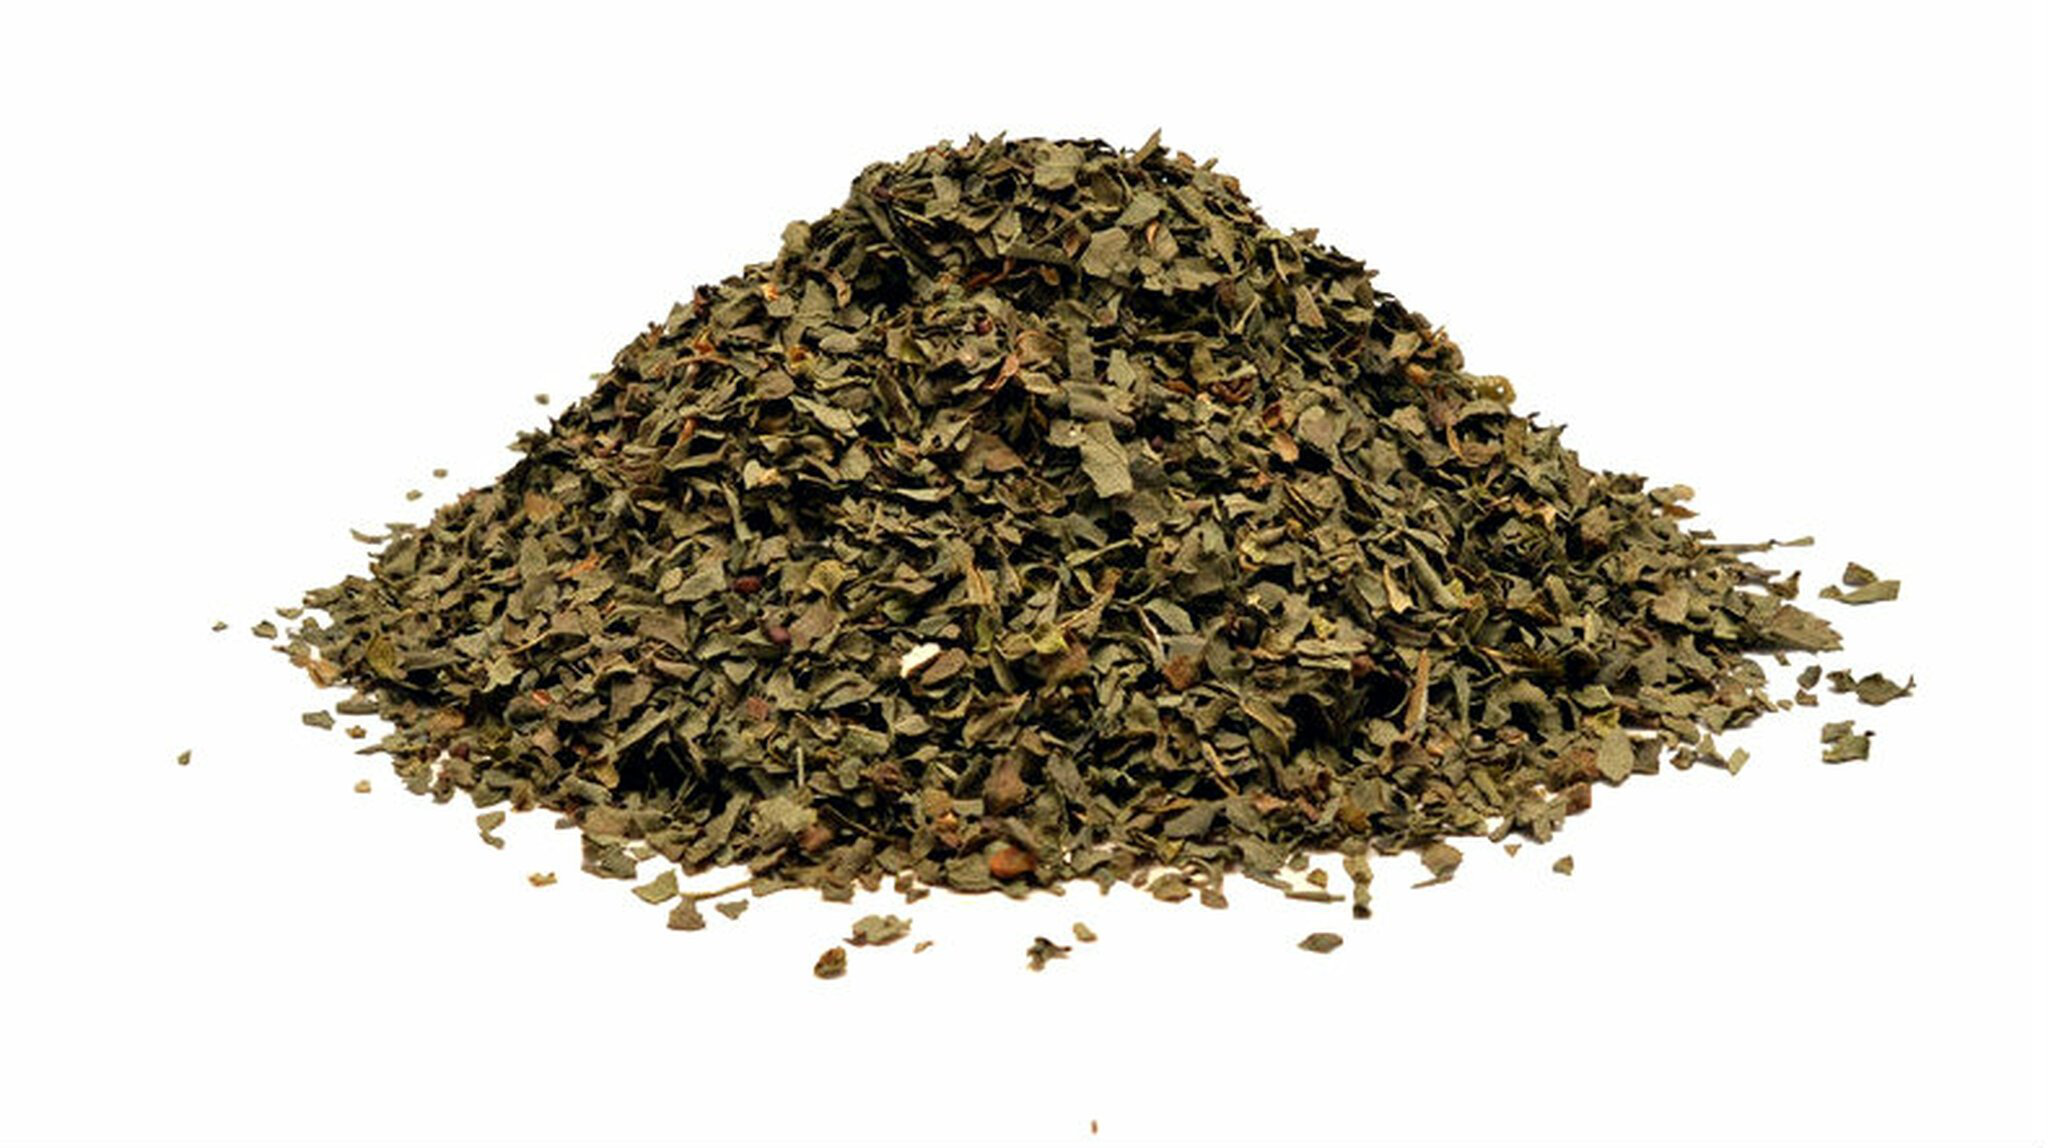

In [20]:
# Show tall image
img = Image.open('./dataset/dried_basil/basil14.jpg')
img

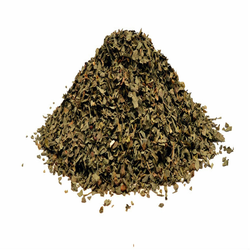

In [21]:
# Resize tall image
img.resize((250, 250), Image.ANTIALIAS)

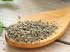

In [22]:
# Show wide image
img2 = Image.open('./dataset/dried_basil/basil40.jpg')
img2

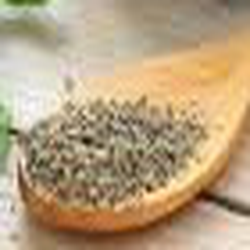

In [23]:
# Resize wide image
img2.resize((250, 250), Image.ANTIALIAS)

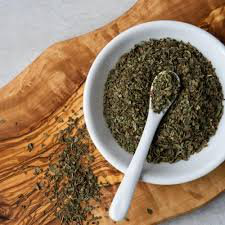

In [24]:
# Show small image
img3 = Image.open('./dataset/dried_basil/basil29.jpg')
img3

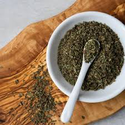

In [25]:
# Resize small image
img3.resize((125, 125), Image.ANTIALIAS)

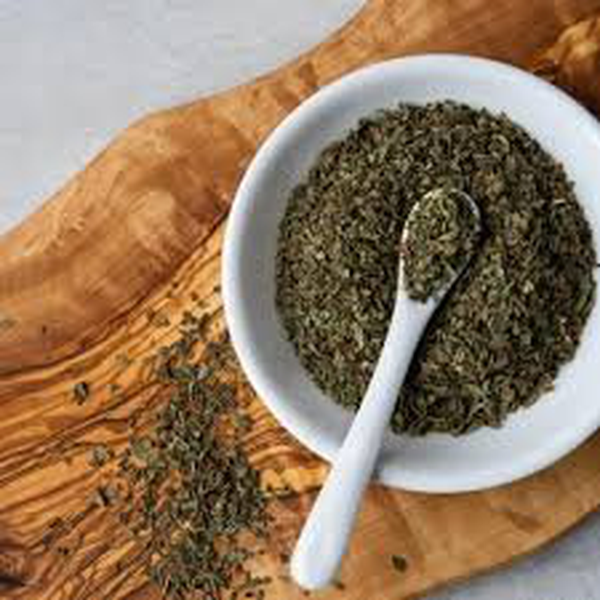

In [26]:
# Resize small image (to larger)
img3.resize((600, 600), Image.ANTIALIAS)

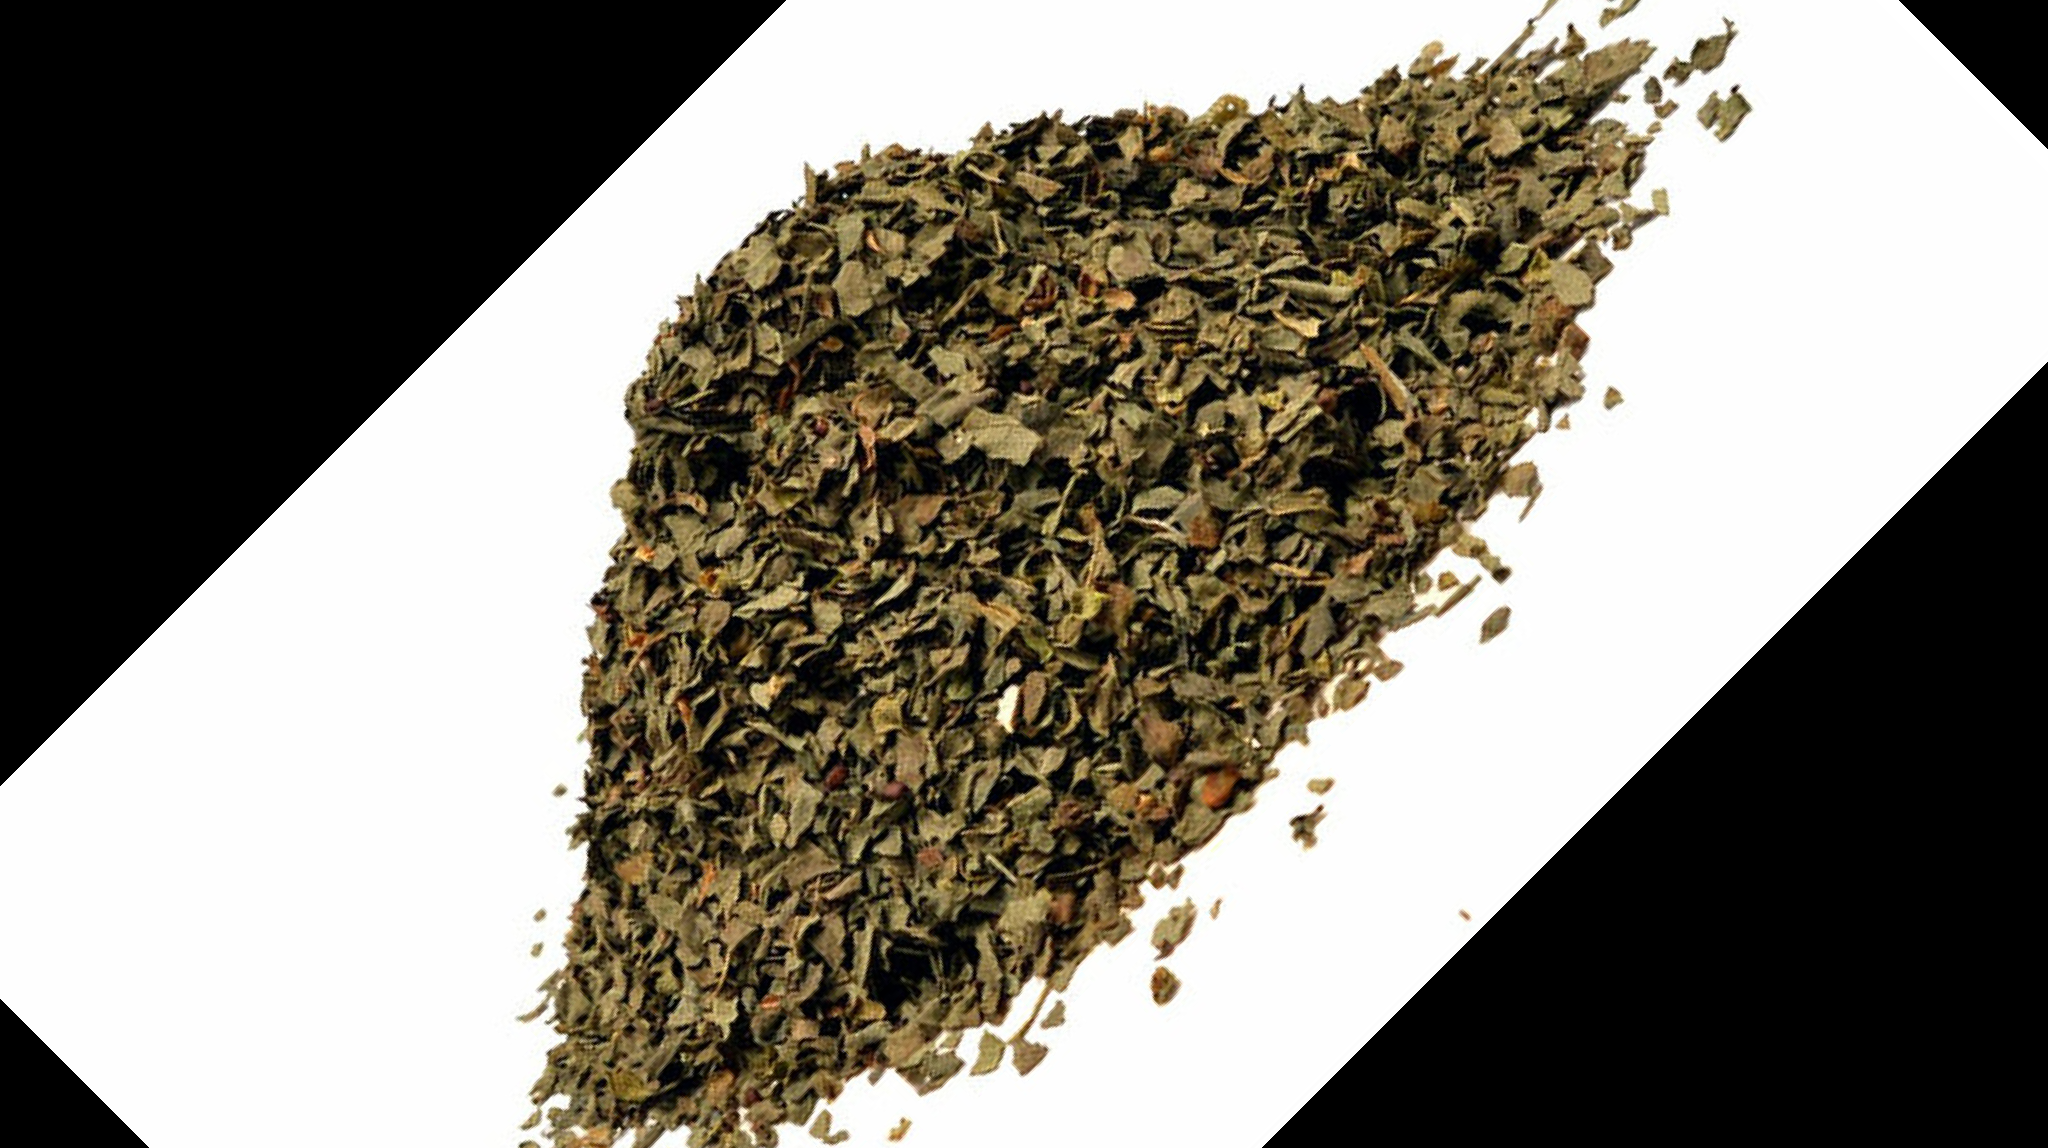

In [28]:
# Rotate image
img.rotate(45)

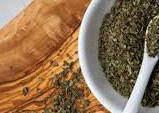

In [29]:
# Crop an image
left = 5
top = img3.size[1] / 4
right = 164
bottom = 3 * img3.size[1] / 4
img3.crop((left, top, right, bottom))

In [ ]:
# Save an image
img_r = img_r.save("test_save.jpg")